# Homework 10: Cartopy

### 1) Plot data from NARR

NARR is NCEP's [North American Regional Reanalysis](https://www.esrl.noaa.gov/psd/data/gridded/data.narr.html), a widely used product for studying the weather and climate of the continental US. The data is available from NOAA's [Earth System Research Laboratory](https://www.esrl.noaa.gov/) via [OPeNDAP](https://en.wikipedia.org/wiki/OPeNDAP), meaing that xarray can opent the data "remotely" without downloading a file.

For this problem, you should open this geopential height file:

    https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/pressure/hgt.201810.nc
    
And this precipitation file:

    https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/monolevel/apcp.2018.nc
    
Your goal is to make a map that looks like the one below. It shows total precipitation on Oct. 15, 2018 in blue, plus contours of the 500 mb geopotential surface.

_Hint: examine the dataset variables and attirbutes carefully in order to determine the projection of the data._

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from netCDF4 import Dataset
%matplotlib inline
# import and open the dataset
ds_hgt =xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/pressure/hgt.201810.nc')
pr =xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/monolevel/apcp.2018.nc')

#do a little detective work
ds_hgt.Lambert_Conformal

/opt/conda/lib/python3.6/site-packages/xarray/conventions.py:362: SerializationWarning: variable 'hgt' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  stack_char_dim=stack_char_dim)
/opt/conda/lib/python3.6/site-packages/xarray/conventions.py:362: SerializationWarning: variable 'apcp' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  stack_char_dim=stack_char_dim)


<xarray.Dataset>
Dimensions:            (nbnds: 2, time: 304, x: 349, y: 277)
Coordinates:
  * time               (time) datetime64[ns] 2018-01-01 2018-01-02 ...
  * y                  (y) float32 0.0 32463.0 64926.0 97389.0 129852.0 ...
  * x                  (x) float32 0.0 32463.0 64926.0 97389.0 129852.0 ...
    lat                (y, x) float32 ...
    lon                (y, x) float32 ...
Dimensions without coordinates: nbnds
Data variables:
    Lambert_Conformal  int32 ...
    time_bnds          (time, nbnds) float64 ...
    apcp               (time, y, x) float32 ...
Attributes:
    Conventions:                     CF-1.2
    centerlat:                       50.0
    centerlon:                       -107.0
    comments:                        
    institution:                     National Centers for Environmental Predi...
    latcorners:                      [ 1.000001  0.897945 46.3544   46.63433 ]
    loncorners:                      [-145.5       -68.32005    -2.569891  14.

<a list of 25 text.Text objects>

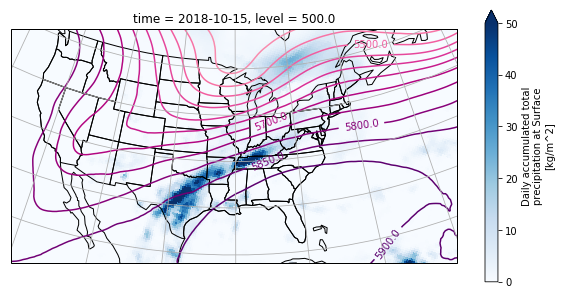

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

#give a range for the US map and find the central lon and lat
attrs =ds_hgt.Lambert_Conformal.attrs
apcp = pr.apcp.sel(time='2018-10-15')
extent = [-120,-60.5,20,50]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

#set projection equals to our targeted variab les
proj = ccrs.LambertConformal(central_lon,central_lat)
fig = plt.figure(figsize=[10, 5])
ax = plt.axes(projection = proj)
ax.set_extent(extent)
ax.gridlines()
ax.coastlines()
ax.add_feature(cfeature.STATES)

#select the time and variables and specify pressure level to make it 2D
hgt = ds_hgt.hgt.sel(time = '2018-10-15',level=500)
proj = ccrs.LambertConformal(
    central_longitude = attrs['longitude_of_central_meridian'],
    central_latitude = attrs['latitude_of_projection_origin'],
    false_easting = attrs['false_easting'],
    false_northing = attrs['false_northing'],
    standard_parallels = attrs['standard_parallel'])
apcp.plot(ax=ax,transform=proj,cmap='Blues',vmax=50)
c0= hgt.plot.contour(ax=ax,transform=proj,colors='RdPu',levels=20)

# annotate the pressure levels
plt.clabel(c0, fmt='%2.1f')

### 2) Antarctic Sea Ice

Download this file and then use it to plot the concentration of Antarctic Sea Ice on Aug. 7, 2017. Again, you will need to explore the file contents in order to determine the correct projection.

In [15]:
! wget ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/south/daily/2017/seaice_conc_daily_sh_f17_20170807_v03r01.nc

--2018-11-21 02:13:05--  ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/south/daily/2017/seaice_conc_daily_sh_f17_20170807_v03r01.nc
           => ‘seaice_conc_daily_sh_f17_20170807_v03r01.nc.2’
Resolving sidads.colorado.edu (sidads.colorado.edu)... 128.138.135.20
Connecting to sidads.colorado.edu (sidads.colorado.edu)|128.138.135.20|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/DATASETS/NOAA/G02202_V3/south/daily/2017 ... done.
==> SIZE seaice_conc_daily_sh_f17_20170807_v03r01.nc ... 2682793
==> PASV ... done.    ==> RETR seaice_conc_daily_sh_f17_20170807_v03r01.nc ... done.
Length: 2682793 (2.6M) (unauthoritative)

seaice_conc_daily_s 100%[===================>]   2.56M  4.17MB/s    in 0.6s    

2018-11-21 02:13:06 (4.17 MB/s) - ‘seaice_conc_daily_sh_f17_20170807_v03r01.nc.2’ saved [2682793]



In [16]:
#open the dataset
an =xr.open_dataset('seaice_conc_daily_sh_f17_20170807_v03r01.nc')
an

/opt/conda/lib/python3.6/site-packages/xarray/conventions.py:362: SerializationWarning: variable 'melt_onset_day_seaice_conc_cdr' has multiple fill values {-1, 65535}, decoding all values to NaN.
  stack_char_dim=stack_char_dim)


<xarray.Dataset>
Dimensions:                         (time: 1, xgrid: 316, ygrid: 332)
Coordinates:
  * time                            (time) datetime64[ns] 2017-08-07
  * ygrid                           (ygrid) float32 4337500.0 4312500.0 ...
  * xgrid                           (xgrid) float32 -3937500.0 -3912500.0 ...
    latitude                        (ygrid, xgrid) float64 ...
    longitude                       (ygrid, xgrid) float64 ...
Data variables:
    projection                      |S1 ...
    seaice_conc_cdr                 (time, ygrid, xgrid) float32 ...
    stdev_of_seaice_conc_cdr        (time, ygrid, xgrid) float32 ...
    melt_onset_day_seaice_conc_cdr  (time, ygrid, xgrid) float32 ...
    qa_of_seaice_conc_cdr           (time, ygrid, xgrid) float32 ...
    goddard_merged_seaice_conc      (time, ygrid, xgrid) float32 ...
    goddard_nt_seaice_conc          (time, ygrid, xgrid) float32 ...
    goddard_bt_seaice_conc          (time, ygrid, xgrid) float32 ...
Attribut

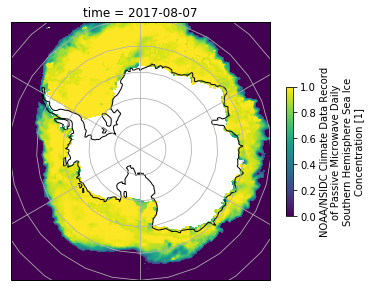

In [21]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

#set up the plot and create upper bound for sea ice cover percentage (less than or equal to 100%)
#use the framework specifically for South Pole
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
fig.subplots_adjust(bottom=0.05, top=0.95,
                        left=0.04, right=0.95, wspace=0.02)
ubound = an.where(an.seaice_conc_cdr <= 1)
ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

#with the mask to make the plot
ubound.seaice_conc_cdr.plot(ax=ax1,transform = ccrs.SouthPolarStereo(),vmin=0, vmax=1,cbar_kwargs={'shrink':0.4})
#ax1.add_feature(cfeature.LAND)
#ax1.add_feature(cfeature.OCEAN)
ax1.gridlines()
ax1.coastlines()
plt.show()

### 3) Global USGS Earthquakes

Reload the file we explored in homework 5 using pandas

    http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv
    
and use the data to recreate this map.

In [19]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,7)
%matplotlib inline
import pandas as pd
import pandas as pd
#open the dataset
df = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


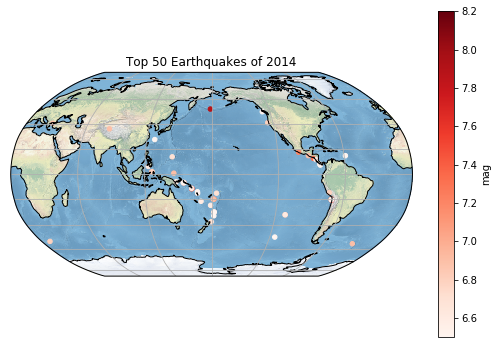

In [20]:
#first find out the top 50 earthquakes
largemag = df.nlargest(50,'mag')

#create a plot and choose Robinson for a round graph
plt.figure(figsize=(9, 7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.stock_img()

#use a scatter plot and transform set to PlateCarree
largemag.plot(kind = 'scatter',x='longitude',y='latitude',c='mag',cmap='Reds',figsize = (9,6),ax=ax,transform = ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.gridlines()
ax.coastlines()
ax.set_title('Top 50 Earthquakes of 2014')
plt.show()